In [391]:
from scipy import misc
import numpy as np
from numpy import random
from IPython.display import Image

# read sample image (we cheat and use resized (smaller) image first)
img = misc.imread('micmacs_resized.jpg')
# prints pixel by pixel RGB info
img

array([[[66, 62, 15],
        [69, 65, 20],
        [70, 66, 21],
        ..., 
        [28, 25,  6],
        [28, 25,  6],
        [30, 25,  6]],

       [[72, 67, 25],
        [71, 67, 22],
        [71, 67, 20],
        ..., 
        [29, 26,  7],
        [29, 26,  7],
        [28, 25,  6]],

       [[67, 62, 20],
        [66, 62, 17],
        [68, 64, 16],
        ..., 
        [30, 27,  8],
        [29, 26,  7],
        [28, 25,  6]],

       ..., 
       [[19, 13,  1],
        [19, 14,  8],
        [23, 14,  7],
        ..., 
        [20, 11,  2],
        [14, 10,  1],
        [11, 11,  3]],

       [[16, 12,  0],
        [18, 11,  3],
        [24, 11,  2],
        ..., 
        [18, 11,  3],
        [13, 10,  3],
        [ 9,  9,  1]],

       [[19, 15,  3],
        [18, 11,  1],
        [24, 10,  0],
        ..., 
        [18, 11,  5],
        [12, 12,  4],
        [ 9,  9,  1]]], dtype=uint8)

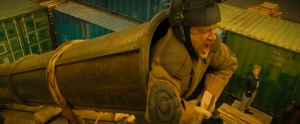

In [392]:
Image(filename='micmacs_resized.jpg') 

In [393]:
# see what the image is
# misc.imshow(img)

In [394]:
# check the image dimension (it is 128x128 pixel)
img.shape

(124, 300, 3)

In [395]:
# check the RGB intensities
img[1,2,] # red, green, blue intensities for pixel 1x2 (index starts from 0)

array([71, 67, 20], dtype=uint8)

In [396]:
k = 10 # number of clusters (colors)

# randomly sample colors from the image
means = np.zeros((k,3))
for i in range(0,k):
    randx=random.randint(0,img.shape[0]-1)
    randy=random.randint(0,img.shape[1]-1)
    means[i,] = img[randx,randy,]
means

array([[  68.,   42.,    5.],
       [ 100.,   69.,    4.],
       [ 128.,   96.,   11.],
       [  46.,   30.,    4.],
       [ 101.,   62.,    7.],
       [  81.,   72.,   17.],
       [ 110.,   74.,    0.],
       [  98.,   77.,   14.],
       [ 150.,  123.,   16.],
       [  11.,   26.,    7.]])

In [397]:
max_iterations = 20;
for itr in range(0,max_iterations):
    # means to be calculated in this iteration
    new_means = np.zeros((k,3))
    # keeps number of members for each cluster
    num_elements = np.zeros((k, 1))
    # loops over all pixels
    for i in range(0, img.shape[0]):
        for j in range(0, img.shape[1]):
            # extracts pixel ixj RGB color
            r = img[i,j,0]
            g = img[i,j,1]
            b = img[i,j,2]
            # computes euclidean distance between pixel ixj and k clusters
            distance = np.sqrt(np.sum(([r,g,b]-means)**2,axis=1))
            # finds the closest cluster, returns its index
            min_index = np.argmin(distance)
            
            new_means[min_index, 0] = new_means[min_index, 0] + r;
            new_means[min_index, 1] = new_means[min_index, 1] + g;
            new_means[min_index, 2] = new_means[min_index, 2] + b;
            
            # increments the number of members in the assigned cluster min_index
            num_elements[min_index] = num_elements[min_index] + 1;
            
    # computes the new means for each cluster
    for i in range(0,k):
        if (num_elements[i] > 0):
            new_means[i,] = new_means[i,] / num_elements[i]
              
    # terminates if threshold is reached, add a threshold here to save time!
    # how about this: 
    # threshold = np.sum(np.sqrt(np.sum((new_means - means)**2, axis=1)),axis=0)
    # if threshold < 1e-5:
        # break
        
    # update means with the new values
    means = new_means
    print("iteration = ",itr)

# generates the new image by replacing pixels in each cluster with its mean
img = misc.imread('micmacs_original.jpg') # load the actual image here
new_img = np.zeros(img.shape)
# loops over all pixels
for i in range(0,img.shape[0]):
    for j in range(0, img.shape[1]):
        r = img[i,j,0]
        g = img[i,j,1]
        b = img[i,j,2]
        # finds the closest cluster
        distance = np.sqrt(np.sum(([r,g,b]-means)**2,axis=1))
        min_index = np.argmin(distance)
        # replaces the pixel with the mean
        new_img[i,j,] = means[min_index,]

iteration =  0
iteration =  1
iteration =  2
iteration =  3
iteration =  4
iteration =  5
iteration =  6
iteration =  7
iteration =  8
iteration =  9
iteration =  10
iteration =  11
iteration =  12
iteration =  13
iteration =  14
iteration =  15
iteration =  16
iteration =  17
iteration =  18
iteration =  19


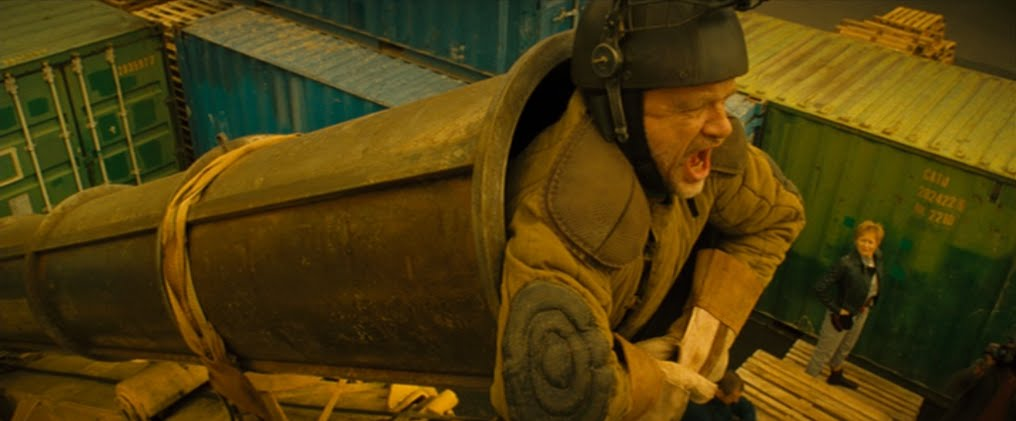

In [398]:
Image(filename='micmacs_original.jpg') 

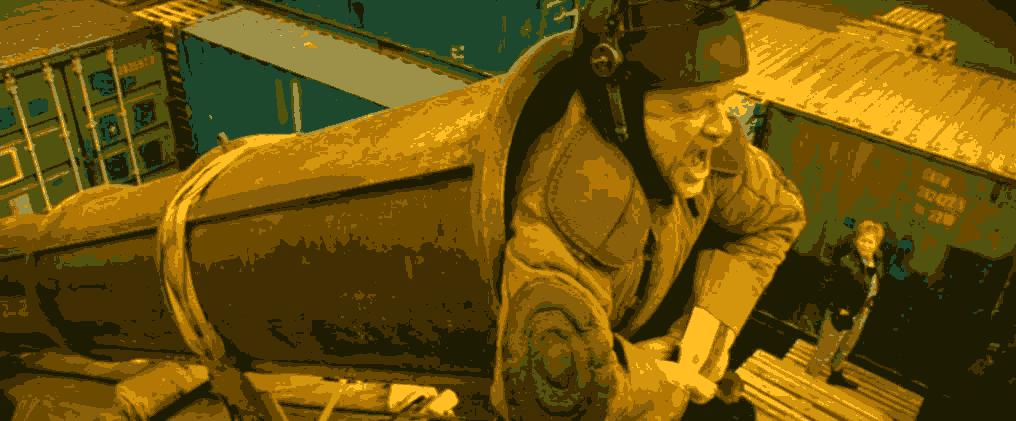

In [399]:
# writes the new image
misc.imsave('micmacs_resampled.jpg', new_img)
Image(filename='micmacs_resampled.jpg') 